---

## Neural Network Ensemble
for faster work

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

In [2]:
print("--------------------------------------------------------------")

#set seed for repeatability
seed = 42
rng = np.random.default_rng(seed)

#import data
data = pd.read_csv('mas_dataset_NN.csv')

X = data[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10']].values #input states

y = data['Y'].values  # whether inside or outside of MAS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) #70/30 train test split

--------------------------------------------------------------


In [3]:
# Train several neural networks on different bootstrap samples
n_ensemble = 120
models = []
for i in range(n_ensemble):
    idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train[idx]
    y_bootstrap = y_train[idx]
    clf = MLPClassifier(hidden_layer_sizes=(5,10), max_iter=1000, random_state=i)
    clf.fit(X_bootstrap, y_bootstrap)
    models.append((f'nn_{i}', clf))

# Create a voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train, y_train)

# Evaluate performance
individual_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for _, clf in models]
ensemble_accuracy = accuracy_score(y_test, ensemble.predict(X_test))

print("NN Accuracies: ", individual_accuracies)
print("Ensemble Accuracy:" , ensemble_accuracy)

NN Accuracies:  [0.968, 0.958, 0.9773333333333334, 0.9693333333333334, 0.9666666666666667, 0.9693333333333334, 0.9686666666666667, 0.9726666666666667, 0.9766666666666667, 0.9666666666666667, 0.9893333333333333, 0.9766666666666667, 0.9793333333333333, 0.9753333333333334, 0.9593333333333334, 0.968, 0.9846666666666667, 0.97, 0.9793333333333333, 0.9733333333333334, 0.968, 0.9826666666666667, 0.9646666666666667, 0.9653333333333334, 0.964, 0.9813333333333333, 0.9833333333333333, 0.9753333333333334, 0.9706666666666667, 0.978, 0.9753333333333334, 0.982, 0.9706666666666667, 0.9753333333333334, 0.9746666666666667, 0.9666666666666667, 0.9713333333333334, 0.9726666666666667, 0.9753333333333334, 0.9713333333333334, 0.9726666666666667, 0.9786666666666667, 0.962, 0.9593333333333334, 0.97, 0.978, 0.9846666666666667, 0.956, 0.9626666666666667, 0.978, 0.98, 0.9746666666666667, 0.9846666666666667, 0.9893333333333333, 0.9566666666666667, 0.9706666666666667, 0.9766666666666667, 0.9726666666666667, 0.971333

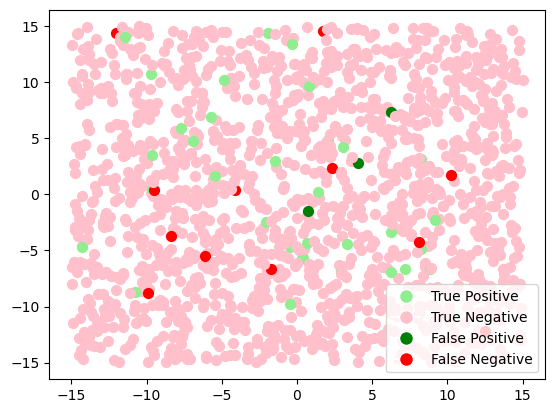

In [5]:
predictions = ensemble.predict(X_test)

fig, ax = plt.subplots()

def add_point(x, y, color):
    ax.scatter(x, y, color=color, s=50)
    plt.draw()

true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0

for i in range(0, len(y_test)):
    color = 'black'
    predicted_value = predictions[i]
    actual_value = y_test[i]
    x_on_plot = X_test[i][0]
    y_on_plot = X_test[i][1]
    if predicted_value == actual_value:
        if predicted_value == 1:
            color = 'lightgreen'
            true_pos += 1
        else:
            color = 'pink'
            true_neg += 1
    else:
        if predicted_value == 1:
            color = 'green'
            false_pos += 1
        else:
            color = 'red'
            false_neg += 1
    add_point(x_on_plot, y_on_plot, color)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='True Positive'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='True Negative'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='False Positive'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False Negative')]

plt.legend(handles=legend_elements)

plt.show()

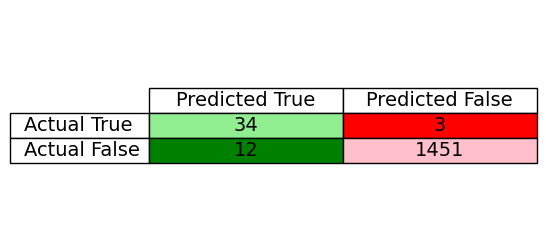

In [7]:
# Data for the table
data = [[true_pos, false_pos], [false_neg, true_neg]]

# Creating the DataFrame with the labels
df = pd.DataFrame(data, columns=['Predicted True', 'Predicted False'], index=['Actual True', 'Actual False'])

# Create a plot to display the table
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Plot the table
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center')

# Set colors for each cell
for (i, j), cell in table.get_celld().items():
    if i == 1 and j == 0:
        cell.set_facecolor('lightgreen')
    elif i == 1 and j == 1:
        cell.set_facecolor('red')
    elif i == 2 and j == 0:
        cell.set_facecolor('green')
    elif i == 2 and j == 1:
        cell.set_facecolor('pink')

# Adjust font size and table styling
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

plt.show()